#作業7
一、分析不同產業別的中小企業貸款違約比例是否具有顯著地差異。

二、分析不同企業型態的中小企業貸款違約比例是否具有顯著地差異。

三、分析不同年齡層負責人的中小企業貸款違約比例是否具有顯著地差異。

分析時請輔以視覺化圖形與檢定結果說明之。

附檔(loan.xlsx)為中小企業貸款資料，其中欄位

loan：貸款還款狀況(貸款後正常繳款或違約)；

in：產業別(1:製造業或2:非製造業);

tpye:企業類型(1:家族企業或2:非家族企業);

age:年齡層(1,2,3,4分別表30以下；30-45;  45-60;  60以上)。

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
data=pd.read_excel('loan2.xlsx')

In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2021-05-12 14:27:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.20.100, 74.125.20.138, 74.125.20.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p77s8e20vigcs9bl0evnaa7glvk8ms2a/1620829650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-05-12 14:27:43--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p77s8e20vigcs9bl0evnaa7glvk8ms2a/1620829650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.98.132, 2607:f8b0:400e:c06::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|108.177.98

In [ ]:
data.head()

,loan,Industry_type,Company_type,Beginning_time,Collateral,Bank_relationship,Capital_increase,Age,Education,Credit
0,1,1,1,4,4,1,4,3,2,2
1,1,2,1,2,3,2,3,4,3,2
2,1,1,1,3,3,1,4,3,4,1
3,1,2,1,4,1,1,4,3,4,2
4,1,1,1,3,1,1,3,2,3,2


#一、分析不同產業別的中小企業貸款違約比例是否具有顯著地差異。
in：產業別(1:製造業或2:非製造業);

In [ ]:
data.groupby('Industry_type').size()

Industry_type
1     88
2    118
dtype: int64

In [ ]:
a=pd.crosstab(data['loan'],data['Industry_type'])
a

Industry_type,1,2
loan,,
1,78,76
2,10,42


In [ ]:
import scipy.stats as stats
cr=stats.chi2_contingency(a)
print("Chi-Square value=%.3f,   p_value=%.3f"%cr[0:2])

Chi-Square value=14.424,   p_value=0.000


In [ ]:
a1=pd.crosstab(data['loan'],data['Industry_type'],margins=False,normalize=1)
a1

Industry_type,1,2
loan,,
1,0.886364,0.644068
2,0.113636,0.355932


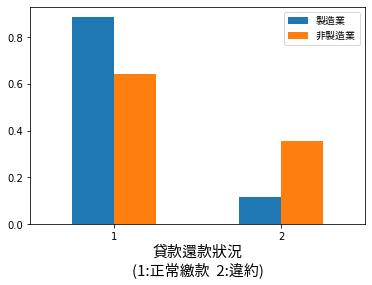

In [ ]:
a1.plot.bar(rot=0)
plt.xlabel('貸款還款狀況\n(1:正常繳款  2:違約)',fontproperties=myfont,fontsize=15)
plt.legend(["製造業", "非製造業"],prop=myfont)

#結論:
由上面程式結果得知:在卡方檢定下 P-value趨近於0的情況，Reject H0。  顯示製造業與非製造業，正常繳款跟違約都具有明顯差異

製造業或非製造業 正常繳款的比率都比較高

#二、分析不同企業型態的中小企業貸款違約比例是否具有顯著地差異。

In [ ]:
hh=pd.crosstab(data['loan'],data['Company_type'])
hh

Company_type,1,2
loan,,
1,124,30
2,43,9


In [ ]:
import scipy.stats as stats
cr=stats.chi2_contingency(hh)
print("Chi-Square value=%.3f,   p_value=%.3f"%cr[0:2])

Chi-Square value=0.020,   p_value=0.888


(0.019910344530335286,
 0.8877877677314174,
 1,
 array([[124.84466019,  29.15533981],
        [ 42.15533981,   9.84466019]]))

In [ ]:
hh1=pd.crosstab(data['loan'],data['Company_type'],margins=False,normalize=1)
hh1

Company_type,1,2
loan,,
1,0.742515,0.769231
2,0.257485,0.230769


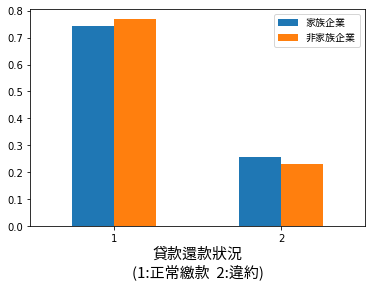

In [ ]:
hh1.plot.bar(rot=0)
plt.xlabel('貸款還款狀況\n(1:正常繳款  2:違約)',fontproperties=myfont,fontsize=15)
plt.legend(["家族企業", "非家族企業"],prop=myfont)

#結論:
由上面程式結果得知:在卡方檢定下 P-value大於0.05的情況，接受 H0。  顯示家族企業非家族企業的  "正常繳款"  &  "違約"  沒有明顯差異

家族或非家族 正常繳款的比率都比較高

#三、分析不同年齡層負責人的中小企業貸款違約比例是否具有顯著地差異。

In [ ]:
b=pd.crosstab(data['loan'],data['Age'])
b

Age,1,2,3,4
loan,,,,
1,0,47,82,25
2,8,31,10,3


In [ ]:
import scipy.stats as stats
cr=stats.chi2_contingency(b)
print("Chi-Square value=%.3f,   p_value=%.3f"%cr[0:2])

Chi-Square value=45.587,   p_value=0.000


In [ ]:
bb=pd.crosstab(data['loan'],data['Age'],margins=False,normalize=1)
bb

Age,1,2,3,4
loan,,,,
1,0.0,0.602564,0.891304,0.892857
2,1.0,0.397436,0.108696,0.107143


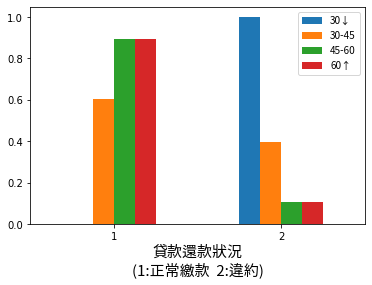

In [ ]:
bb.plot.bar(rot=0)
plt.xlabel('貸款還款狀況\n(1:正常繳款  2:違約)',fontproperties=myfont,fontsize=15)
plt.legend(["30↓","30-45","45-60","60↑"],prop=myfont)

#結論:
由上面程式結果得知:在卡方檢定下 P-value大於0.05的情況，拒絕 H0。  根據數值可以發現年紀越大違約的比率就越小